# Browyn Sherman DSTEP Final 

## Problem Statement

I am interested exploring education policy and school choice. Charter schools are one particular school choice option that have been a hot topic nationally. Charter schools are public schools that are independently operated. I am interested in exploring how charter schools compare to traditional public schools in terms of the populations they serve and the educational outcomes they achieve. I chose to focus on the state of Minnesota because they were the first state to authorize a public charter school in 1992. The Minnesota Department of Education collects data from schools and districts throughout the state and makes reports available to the public. Additional information about charter schools in the state of Minnesota is available here: https://education.mn.gov/mde/fam/cs/

# Data Sources

## Geospatial Data
I used the following datasets to collect infromation about the names and locations of charter schools in Minnesota.
1) This dataset lists all current (as of 11-17-23) 181 charter schools in the state of Minnesota, however, it does not include geospatial data: https://public.education.mn.gov/MdeOrgView/search/tagged/MDEORG_CHARTER_LEA,MARSSOperating
2) This dataset includes geospatial information for various public education institutions in Minnesota: https://gisdata.mn.gov/dataset/struc-school-program-locs 
3) This source provides geospatial data for school districts in Minnesota: https://gisdata.mn.gov/dataset/bdry-school-district-boundaries

## Enrollment Data
I used the following datasets to collect enrollment and demographic data for charter schools in Minnesota as well as statewide data for all public schools. 
* Student enrollment data from the 2013-2014 school year through the 2022-2023 school year is available here: https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=2. 

## Testing Data 
* This source has data on standardized testing results https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=1 and this source provides context: https://education.mn.gov/MDE/dse/test/mn/. This data may be useful in comparing academic outcomes between charters and traditional public schools.

# Dictionary

## Geospatial Data

1) Source: https://public.education.mn.gov/MdeOrgView/tag/extractContacts/MDEORG_CHARTER_LEA,MARSSOperating?description=

* Organization: Column 4 lists the name of each charter school. String.
* Physical Line 1: Column 16 includes the first line of the physical address for each school. String.
* Physical Line 2: Column 17 contains the second line of the physical address for each school. It is empty for most schools, though some list suite numbers. String.
* Physical City: Column 18 contains the city in which each school is physically located. String.
* Physical State: Column 19 contains the state for the physical address for each school. It is "MN" for all rows. String.
* Physical Zip: Column 20 contains the zip code for the physical address for each school. These are numeric values that load in as a string.
* County: Column 21 lists the county in which each school is located. String. 
* Grades: Column 22 lists the grade levels that each school serves. String.
* School Classification: Column 23 lists a numeric code that corresponds with a school description (i.e. Elementary School) outlined here: https://public.education.mn.gov/MdeOrgView/reference/schoolClassTypes. 
* Web URL: Column 28. This lists the website for each school. String.

2) Source: school_program_locations.csv from https://gisdata.mn.gov/dataset/struc-school-program-locs
* ORGTYPE: Column 1. This contains a numeric value that represents the organization type. Charter schools are type 7. The key is available here https://education.mn.gov/MDE/mde074910. Integer. 
* GISNAME: Column 5. This column represents the name of the school or organization. String. 
* GISADDR: Column 8. This represents the full physical address of each institution. String. 
* WEB_URL: Column 22 contains the website url for each institution. String. 
* latitude: Column 24 is the latitude of the physical location of each institution in decimal degrees. Float. 
* longitude: Column 25 is the latitude of the physical location of each institution in decimal degrees. Float. 

3)Source: school_district_boundaries.shp from https://gisdata.mn.gov/dataset/bdry-school-district-boundaries
* PRENAME: Column 4 includes the name of each district. String.
* WEB_URL: Column 6 lists the website url for each district. String. 
* geometry: Column 11 includes the shape of each district. Geometry. 

## Enrollment Data

4) Source: Datasets retrieved from https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=2

2014 through 2021
* Data Year: Column 0 lists the school year for which the data was collected. String 
* County Name: Column 2 includes the name of the county in which the school is located. String.
* School Name: Column 7 includes the name of the school. String. 
* Grade: Column 11 indicates the grade level for which the data was collected.School Readiness Plus and Voluntary PreKindergarten are both "PK", "ECSE" is early childhood special education. "All Grades" includes all grades PK-12. String. 
* Total Enrollment: Column 12 indicates the total number of students enrolled at the school as of October 1st of that year. Float
* Total Female Count: Column 14 indicates the total number of female students enrolled. Float.
* Total Male Count': Column 16 indicates the total number of male students enrolled. Float.
* Total American Indian or Alaska Native Count: Column 18 indicates the total number of Native American students enrolled. Float.
* Total Asian Count: Column 22 indicates the total number of Asian students enrolled. Float. 
* Total Native Hawaiian or Pacific Islander Count: Column 26 indicates the total number of Native Hawaiian or Pacific Islander Students enrolled. Float.
* Total Hispanic or Latino Count: Column 30 indicates the total number of Hispanic or Latino students enrolled. Float.
* Total Black or African American Count: Column 34 indicates the total number of African American Students Enrolled. Float.
* Total White Count: Column 38 indicates the total number of white students enrolled. Float.
* Total Two or More Races Count: Column 42 indicates the total number of students who are two or more races enrolled. Float.
* Total Students of Color or American Indian Count: Column 46 indicates the total number of students who are not included in the white student count. Float.
* Total Students Eligible for Free or Reduced-Priced Meals Count: Column 48 indicates the total number of students enrolled who qualify for free of reduced-price meals. Float.
* Total Students Receiving Special Education Services Count: Column 50 indicates the total number of students enrolled recieving special education services. Float.
* Total English learner Identified Count: Column 52 indicates the total number of students who have been identified as English language learners. Float.
* Total Students Experiencing Homelessness Count: Column 54 indicates the total number of students enrolled who are experiencing homelessness. Float.

Column numbers are slightly different in years 2022 & 2023, though values remain the same.

# Testing Data

In [1]:
# -- Import Useful Tools
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly_express as px
import contextily as ctx
import time 

# Maps

In [2]:
# -- Load source 1 data: list of current charter schools 
fname='https://public.education.mn.gov/MdeOrgView/tag/extractContacts/MDEORG_CHARTER_LEA,MARSSOperating?description='
charter_only=pd.read_csv(fname)

# -- Select useful columns
sub=[4, 16, 17, 18, 19, 20, 21, 22, 23, 28]
cols=charter_only.columns[sub]
charter_only=charter_only[cols]

# -- Remove duplicate rows
charter_only= charter_only.drop_duplicates()

# -- Remove // from website column 
split = charter_only["Web URL"].str.split("/", expand=True)
charter_only['Web_URL']=split[2]

# -- Load in source 2 data for coordinates
dpath="/Users/bls/Sherman_DSTEP23_Final/"
fname = dpath + 'school_program_locations.csv'
statewide=pd.read_csv(fname)

# -- Select Charter Schools Only (org type 7)
statewide = statewide[statewide['ORGTYPE'] == 7]

# -- Remove // from website column 
split = statewide["WEB_URL"].str.split("/", expand=True)
statewide['website']=split[2]

# -- Sub Select schools that appear in the charters dataframe
sub= statewide['website'].isin(charter_only['Web_URL'])
statewide = statewide[sub]

# -- Select useful columns
sub=[1, 5, 8, 24, 25, 26]
cols=statewide.columns[sub]
statewide=statewide[cols]

# -- Merge DataFrames 
charters = pd.merge(charter_only, statewide, right_on='website', left_on='Web_URL')

# -- Select useful columns
sub=[0, 6, 7, 8, 13, 14, 15, 16]
cols=charters.columns[sub]
charters=charters[cols]

# -- Rename columns for clarity 
charters.columns = ['school', 'county', 'grade_level', 'school_class', 'address', 'lat', 'lon', 'website']

# -- Remove duplicate rows
charters= charters.drop_duplicates(subset='website')

# -- Load in source 3 data to get District Geospatial Data
dpath="/Users/bls/Sherman_DSTEP23_Final/"
fname1=dpath+'school_district_boundaries.shp'
districts=gpd.read_file(fname1)

# -- convert to decimal degrees
districts = districts.to_crs("epsg:4326")

# -- Display
charters

,school,county,grade_level,school_class,address,lat,lon,website
0,City Academy,Ramsey,9-12,0,"958 Jessie St, Saint Paul, MN 55130",44.969944,-93.076971,www.cityacademy.org
3,Bluffview Montessori,Winona,KG-8,0,"1321 Gilmore Ave, Winona, MN 55987",44.047626,-91.671690,www.bluffviewmontessori.org
5,"New Heights School, Inc.",Washington,KG-12,0,"614 W Mulberry St, Stillwater, MN 55082",45.057780,-92.816105,www.newheightsschool.com
8,Metro Deaf School,Ramsey,EC-12,0,"1125 Energy Park Dr, Saint Paul, MN 55108",44.972822,-93.147522,www.mdsmn.org
11,Minnesota New Country School,Sibley,KG-12,0,"210 Main St, Henderson, MN 56044",44.528928,-93.903436,www.newcountryschool.com
...,...,...,...,...,...,...,...,...
417,Rollingstone Community School,Winona,KG-5,0,"61 Main St, Rollingstone, MN 55969",44.097982,-91.821818,rollingstonecommunityschool.com
418,Bultum Academy Charter School,Anoka,PK-8,0,"1555 40th Ave NE, Columbia Heights, MN 55421",45.042379,-93.236517,www.bultumacademy.org
419,Marine Village School,Washington,PK-8,0,"550 Pine St, Marine On Saint Croix, MN 55047",45.201795,-92.773025,www.marinevillageschool.org
421,Endazhi-Nitaawiging,Beltrami,KG-8,0,"25065 Highway 1 W, Red Lake, MN 56671",47.871070,-95.029424,www.redlakecharterschool.com


<IPython.core.display.Javascript object>


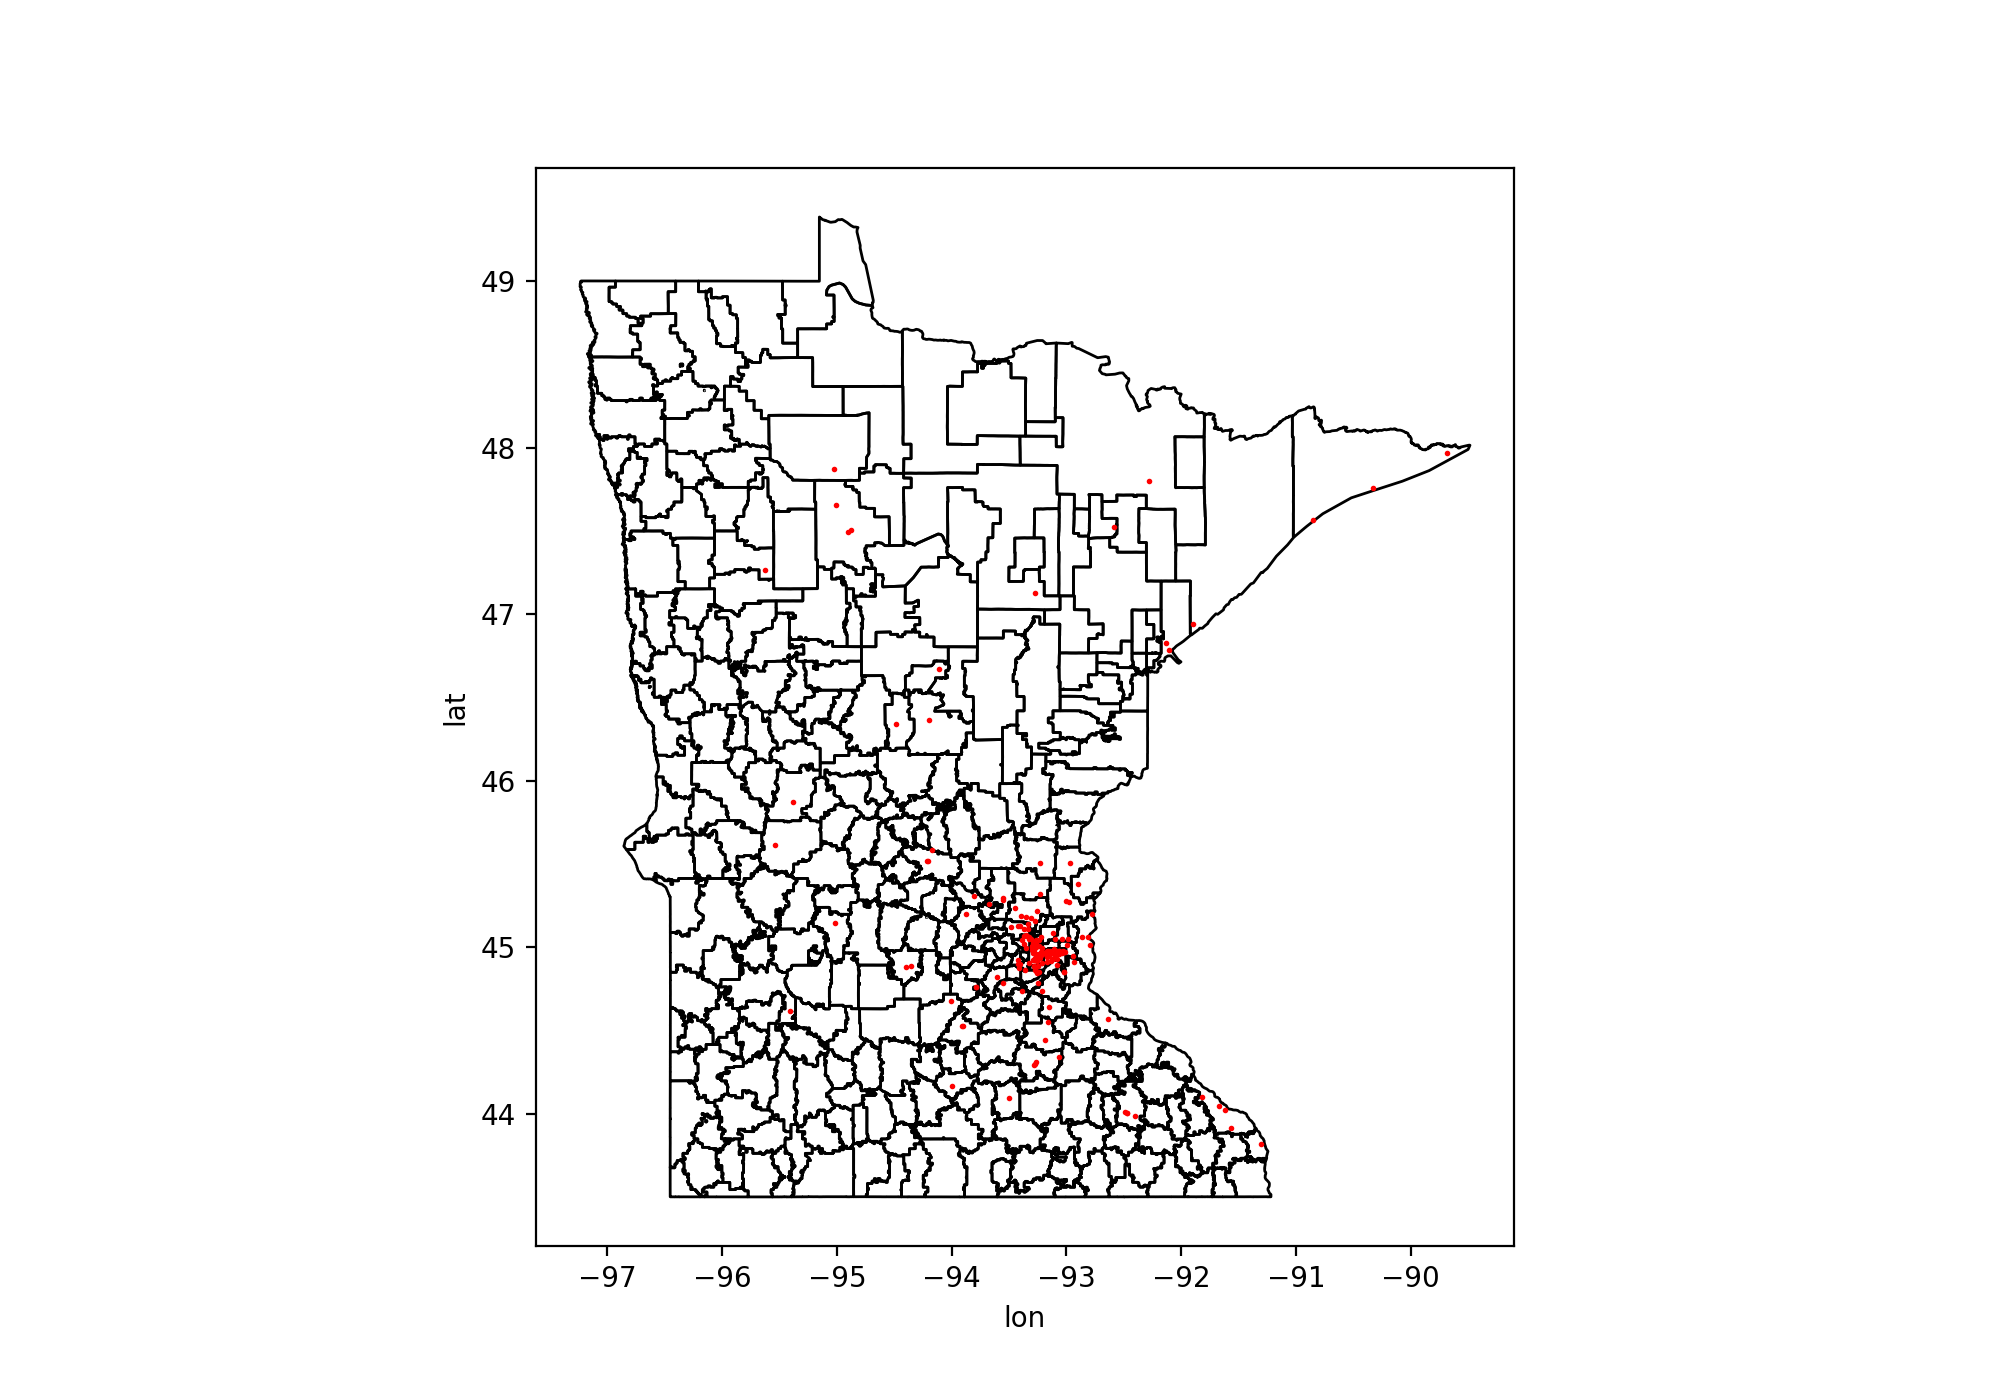

In [3]:
# -- Plot charters on district map
fig, ax= plt.subplots(figsize=(10,7))
districts.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
charters.plot.scatter('lon', 'lat', ax=ax, color='red', s=1)
fig.show()

## Enrollment

In [4]:
# -- Load in Data 
f2014 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086207'
f2015 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086206'
f2016 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086205'
f2017 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086204'
f2018 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086203'
f2019 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086102'
f2020 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE031850'
f2021 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD034978'
f2022 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD058443'
f2023 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD070854'

In [5]:
# -- Load in data by school

t0 = time.time()

sy14=pd.read_excel(f2014, sheet_name='School', skiprows=1)
sy15=pd.read_excel(f2015, sheet_name='School', skiprows=1)
sy16=pd.read_excel(f2016, sheet_name='School', skiprows=1)
sy17=pd.read_excel(f2017, sheet_name='School', skiprows=1)
sy18=pd.read_excel(f2018, sheet_name='School', skiprows=1)
sy19=pd.read_excel(f2019, sheet_name='School', skiprows=1)
sy20=pd.read_excel(f2020, sheet_name='School', skiprows=1)
sy21=pd.read_excel(f2021, sheet_name='School', skiprows=1)
sy22=pd.read_excel(f2022, sheet_name='School', skiprows=1)
sy23=pd.read_excel(f2023, sheet_name='School', skiprows=1)

t1 = time.time()
print("route calculated in {0}s".format(t1 - t0))

/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1322.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1364.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1363.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: State!$1:$18.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot b

route calculated in 111.91410517692566s


In [45]:
# -- Select Charter Schools Only (district type 7)
sy14_sub=sy14[sy14['District Type'] == 7]
sy15_sub=sy15[sy15['District Type'] == 7]
sy16_sub=sy16[sy16['District Type'] == 7]
sy17_sub=sy17[sy17['District Type'] == 7]
sy18_sub=sy18[sy18['District Type'] == 7]
sy19_sub=sy19[sy19['District Type'] == 7]
sy20_sub=sy20[sy20['District Type'] == 7]
sy21_sub=sy21[sy21['District Type'] == 7]
sy22_sub=sy22[sy22['District Type'] == 7]
sy23_sub=sy23[sy23['District Type'] == 7]

# -- Select data for all grades 
sy14_sub=sy14_sub[sy14_sub['Grade'] == 'All Grades']
sy15_sub=sy15_sub[sy15_sub['Grade'] == 'All Grades']
sy16_sub=sy16_sub[sy16_sub['Grade'] == 'All Grades']
sy17_sub=sy17_sub[sy17_sub['Grade'] == 'All Grades']
sy18_sub=sy18_sub[sy18_sub['Grade'] == 'All Grades']
sy19_sub=sy19_sub[sy19_sub['Grade'] == 'All Grades']
sy20_sub=sy20_sub[sy20_sub['Grade'] == 'All Grades']
sy21_sub=sy21_sub[sy21_sub['Grade'] == 'All Grades']
sy22_sub=sy22_sub[sy22_sub['Grade'] == 'All Grades']
sy23_sub=sy23_sub[sy23_sub['Grade'] == 'All Grades']

# -- Select only useful columns for 2014-2021
sub = [0, 2, 7, 11, 12, 14, 16, 18, 22, 26, 30, 34, 38, 42, 46, 48, 50, 52, 54]
cols1 = sy14_sub.columns[sub]
cols2 = sy15_sub.columns[sub]
cols3 = sy16_sub.columns[sub]
cols4 = sy17_sub.columns[sub]
cols5 = sy18_sub.columns[sub]
cols6 = sy19_sub.columns[sub]
cols7 = sy20_sub.columns[sub]
cols8 = sy21_sub.columns[sub]
sy14_sub = sy14_sub[cols1]
sy15_sub = sy15_sub[cols2]
sy16_sub = sy16_sub[cols3]
sy17_sub = sy17_sub[cols4]
sy18_sub = sy18_sub[cols5]
sy19_sub = sy19_sub[cols6]
sy20_sub = sy20_sub[cols7]
sy21_sub = sy21_sub[cols8]

# -- Select only useful columns for 2022-2023
sub = [0, 2, 7, 11, 12, 14, 16, 18, 22, 26, 30, 34, 42, 46, 50, 52, 54, 56, 58]
cols9 = sy22_sub.columns[sub]
cols10 = sy23_sub.columns[sub]
sy22_sub = sy22_sub[cols9]
sy23_sub = sy23_sub[cols10]

In [46]:
# -- Load in Data for the State 

MN14=pd.read_excel(f2014, sheet_name='State', skiprows=1)
MN15=pd.read_excel(f2015, sheet_name='State', skiprows=1)
MN16=pd.read_excel(f2016, sheet_name='State', skiprows=1)
MN17=pd.read_excel(f2017, sheet_name='State', skiprows=1)
MN18=pd.read_excel(f2018, sheet_name='State', skiprows=1)
MN19=pd.read_excel(f2019, sheet_name='State', skiprows=1)
MN20=pd.read_excel(f2020, sheet_name='State', skiprows=1)
MN21=pd.read_excel(f2021, sheet_name='State', skiprows=1)
MN22=pd.read_excel(f2022, sheet_name='State', skiprows=1)
MN23=pd.read_excel(f2023, sheet_name='State', skiprows=1)

# -- Select data for all grades 
MN14_sub=MN14[MN14['Grade'] == 'All Grades']
MN15_sub=MN15[MN15['Grade'] == 'All Grades']
MN16_sub=MN16[MN16['Grade'] == 'All Grades']
MN17_sub=MN17[MN17['Grade'] == 'All Grades']
MN18_sub=MN18[MN18['Grade'] == 'All Grades']
MN19_sub=MN19[MN19['Grade'] == 'All Grades']
MN20_sub=MN20[MN20['Grade'] == 'All Grades']
MN21_sub=MN21[MN21['Grade'] == 'All Grades']
MN22_sub=MN22[MN22['Grade'] == 'All Grades']
MN23_sub=MN23[MN23['Grade'] == 'All Grades']

# -- Select useful columns for 2014-2021
sub = [0, 5, 7, 11, 12, 14, 16, 18, 22, 26, 30, 34, 38, 42, 46, 48, 50, 52, 54]
cols1 = MN14_sub.columns[sub]
cols2 = MN15_sub.columns[sub]
cols3 = MN16_sub.columns[sub]
cols4 = MN17_sub.columns[sub]
cols5 = MN18_sub.columns[sub]
cols6 = MN19_sub.columns[sub]
cols7 = MN20_sub.columns[sub]
cols8 = MN21_sub.columns[sub]
MN14_sub = MN14_sub[cols1]
MN15_sub = MN15_sub[cols2]
MN16_sub = MN16_sub[cols3]
MN17_sub = MN17_sub[cols4]
MN18_sub = MN18_sub[cols5]
MN19_sub = MN19_sub[cols6]
MN20_sub = MN20_sub[cols7]
MN21_sub = MN21_sub[cols8]

# -- Select useful columns for 2022-2023
sub = [0, 5, 7, 11, 12, 14, 16, 18, 22, 26, 30, 34, 38, 42, 46, 50, 52, 54, 56, 58]
cols9 = MN22_sub.columns[sub]
cols10 = MN23_sub.columns[sub]
MN22_sub = MN22_sub[cols9]
MN23_sub = MN23_sub[cols10]

# -- group by year and sum
MNgrp14=MN14_sub.groupby("Data Year").sum().reset_index()
MNgrp15=MN15_sub.groupby("Data Year").sum().reset_index()
MNgrp16=MN16_sub.groupby("Data Year").sum().reset_index()
MNgrp17=MN17_sub.groupby("Data Year").sum().reset_index()
MNgrp18=MN18_sub.groupby("Data Year").sum().reset_index()
MNgrp19=MN19_sub.groupby("Data Year").sum().reset_index()
MNgrp20=MN20_sub.groupby("Data Year").sum().reset_index()
MNgrp21=MN21_sub.groupby("Data Year").sum().reset_index()
MNgrp22=MN22_sub.groupby("Data Year").sum().reset_index()
MNgrp23=MN23_sub.groupby("Data Year").sum().reset_index()

# -- combine results into a single dataframe
MN_result = pd.concat([MNgrp14, MNgrp15, MNgrp16, MNgrp17, MNgrp18, MNgrp19, MNgrp20, MNgrp21, MNgrp22, MNgrp23], ignore_index=True)

/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1322.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1364.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1363.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: State!$1:$18.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot b

In [47]:
# -- Need to Address NANs
# -- group by year and sum
grp14=sy14_sub.groupby("Data Year").sum().reset_index()
grp15=sy15_sub.groupby("Data Year").sum().reset_index()
grp16=sy16_sub.groupby("Data Year").sum().reset_index()
grp17=sy17_sub.groupby("Data Year").sum().reset_index()
grp18=sy18_sub.groupby("Data Year").sum().reset_index()
grp19=sy19_sub.groupby("Data Year").sum().reset_index()
grp20=sy20_sub.groupby("Data Year").sum().reset_index()
grp21=sy21_sub.groupby("Data Year").sum().reset_index()
grp22=sy22_sub.groupby("Data Year").sum().reset_index()
grp23=sy23_sub.groupby("Data Year").sum().reset_index()

# -- combine results into a single dataframe
charter_result = pd.concat([grp14, grp15, grp16, grp17, grp18, grp19, grp20, grp21], ignore_index=True)


# -- need to combine years 22 and 23 

charter_result

,Data Year,County Name,School Name,Grade,Total Enrollment,Total Female Count,Total Male Count,Total American Indian or Alaska Native Count,Total Asian Count,Total Native Hawaiian or Pacific Islander Count,...,Total Black or African American Count,Total White Count,Total Two or More Races Count,Total Students of Color or American Indian Count,Total Students Eligible for Free or Reduced-Priced Meals Count,Total Students Receiving Special Education Services Count,Total English learner Identified Count,Total Students Experiencing Homelessness Count,Total Students Eligible for Free or Reduced Priced Meals Count,Total English Learner Identified Count
0,13-14,RamseyWinonaWashingtonHennepinRamseySibleySibl...,CITY ACADEMYBLUFFVIEW MONTESSORINEW HEIGHTS SC...,All GradesAll GradesAll GradesAll GradesAll Gr...,43937.0,22294.0,21643.0,659.0,6279.0,42.0,...,10829.0,20485.0,1497.0,23452.0,12240.0,5443.0,8494.0,799.0,NaN,NaN
1,14-15,RamseyWinonaWashingtonHennepinRamseySibleySibl...,CITY ACADEMYBLUFFVIEW MONTESSORINEW HEIGHTS SC...,All GradesAll GradesAll GradesAll GradesAll Gr...,47747.0,24204.0,23543.0,681.0,6616.0,30.0,...,12334.0,21559.0,1819.0,26188.0,12819.0,5797.0,8728.0,784.0,NaN,NaN
2,15-16,RamseyWinonaWashingtonHennepinRamseySibleySibl...,CITY ACADEMYBLUFFVIEW MONTESSORINEW HEIGHTS SC...,All GradesAll GradesAll GradesAll GradesAll Gr...,50812.0,25829.0,24983.0,677.0,7238.0,39.0,...,13505.0,22149.0,1971.0,28663.0,16421.0,6217.0,9802.0,860.0,NaN,NaN
3,16-17,RamseyWinonaWashingtonHennepinRamseySibleySibl...,CITY ACADEMYBLUFFVIEW MONTESSORINEW HEIGHTS SC...,All GradesAll GradesAll GradesAll GradesAll Gr...,54211.0,27459.0,26752.0,745.0,8044.0,32.0,...,14838.0,22462.0,2340.0,31749.0,19118.0,6827.0,10100.0,976.0,NaN,NaN
4,17-18,RamseyWinonaWashingtonHennepinRamseySibleySibl...,City AcademyBluffview MontessoriNew Heights Sc...,All GradesAll GradesAll GradesAll GradesAll Gr...,56769.0,28655.0,28114.0,783.0,8876.0,37.0,...,15343.0,23017.0,2536.0,33752.0,NaN,7359.0,NaN,1085.0,19711.0,11143.0
5,18-19,RamseyWinonaWashingtonHennepinRamseySibleySibl...,CITY ACADEMYBLUFFVIEW MONTESSORINEW HEIGHTS SC...,All GradesAll GradesAll GradesAll GradesAll Gr...,59482.0,30005.0,29477.0,840.0,9737.0,42.0,...,16072.0,23568.0,2618.0,35914.0,21760.0,7912.0,NaN,994.0,NaN,11684.0
6,19-20,RamseyWinonaWashingtonHennepinRamseySibleySibl...,City AcademyBluffview MontessoriNew Heights Sc...,All GradesAll GradesAll GradesAll GradesAll Gr...,62751.0,31619.0,31132.0,926.0,10305.0,43.0,...,17600.0,23941.0,2845.0,38810.0,22528.0,8638.0,NaN,1252.0,NaN,12927.0
7,20-21,RamseyWinonaWashingtonHennepinRamseySibleySibl...,City AcademyBluffview MontessoriNew Heights Sc...,All GradesAll GradesAll GradesAll GradesAll Gr...,65987.0,33397.0,32590.0,964.0,10585.0,46.0,...,18899.0,25003.0,3134.0,40984.0,NaN,8944.0,NaN,1021.0,24392.0,13536.0


<IPython.core.display.Javascript object>


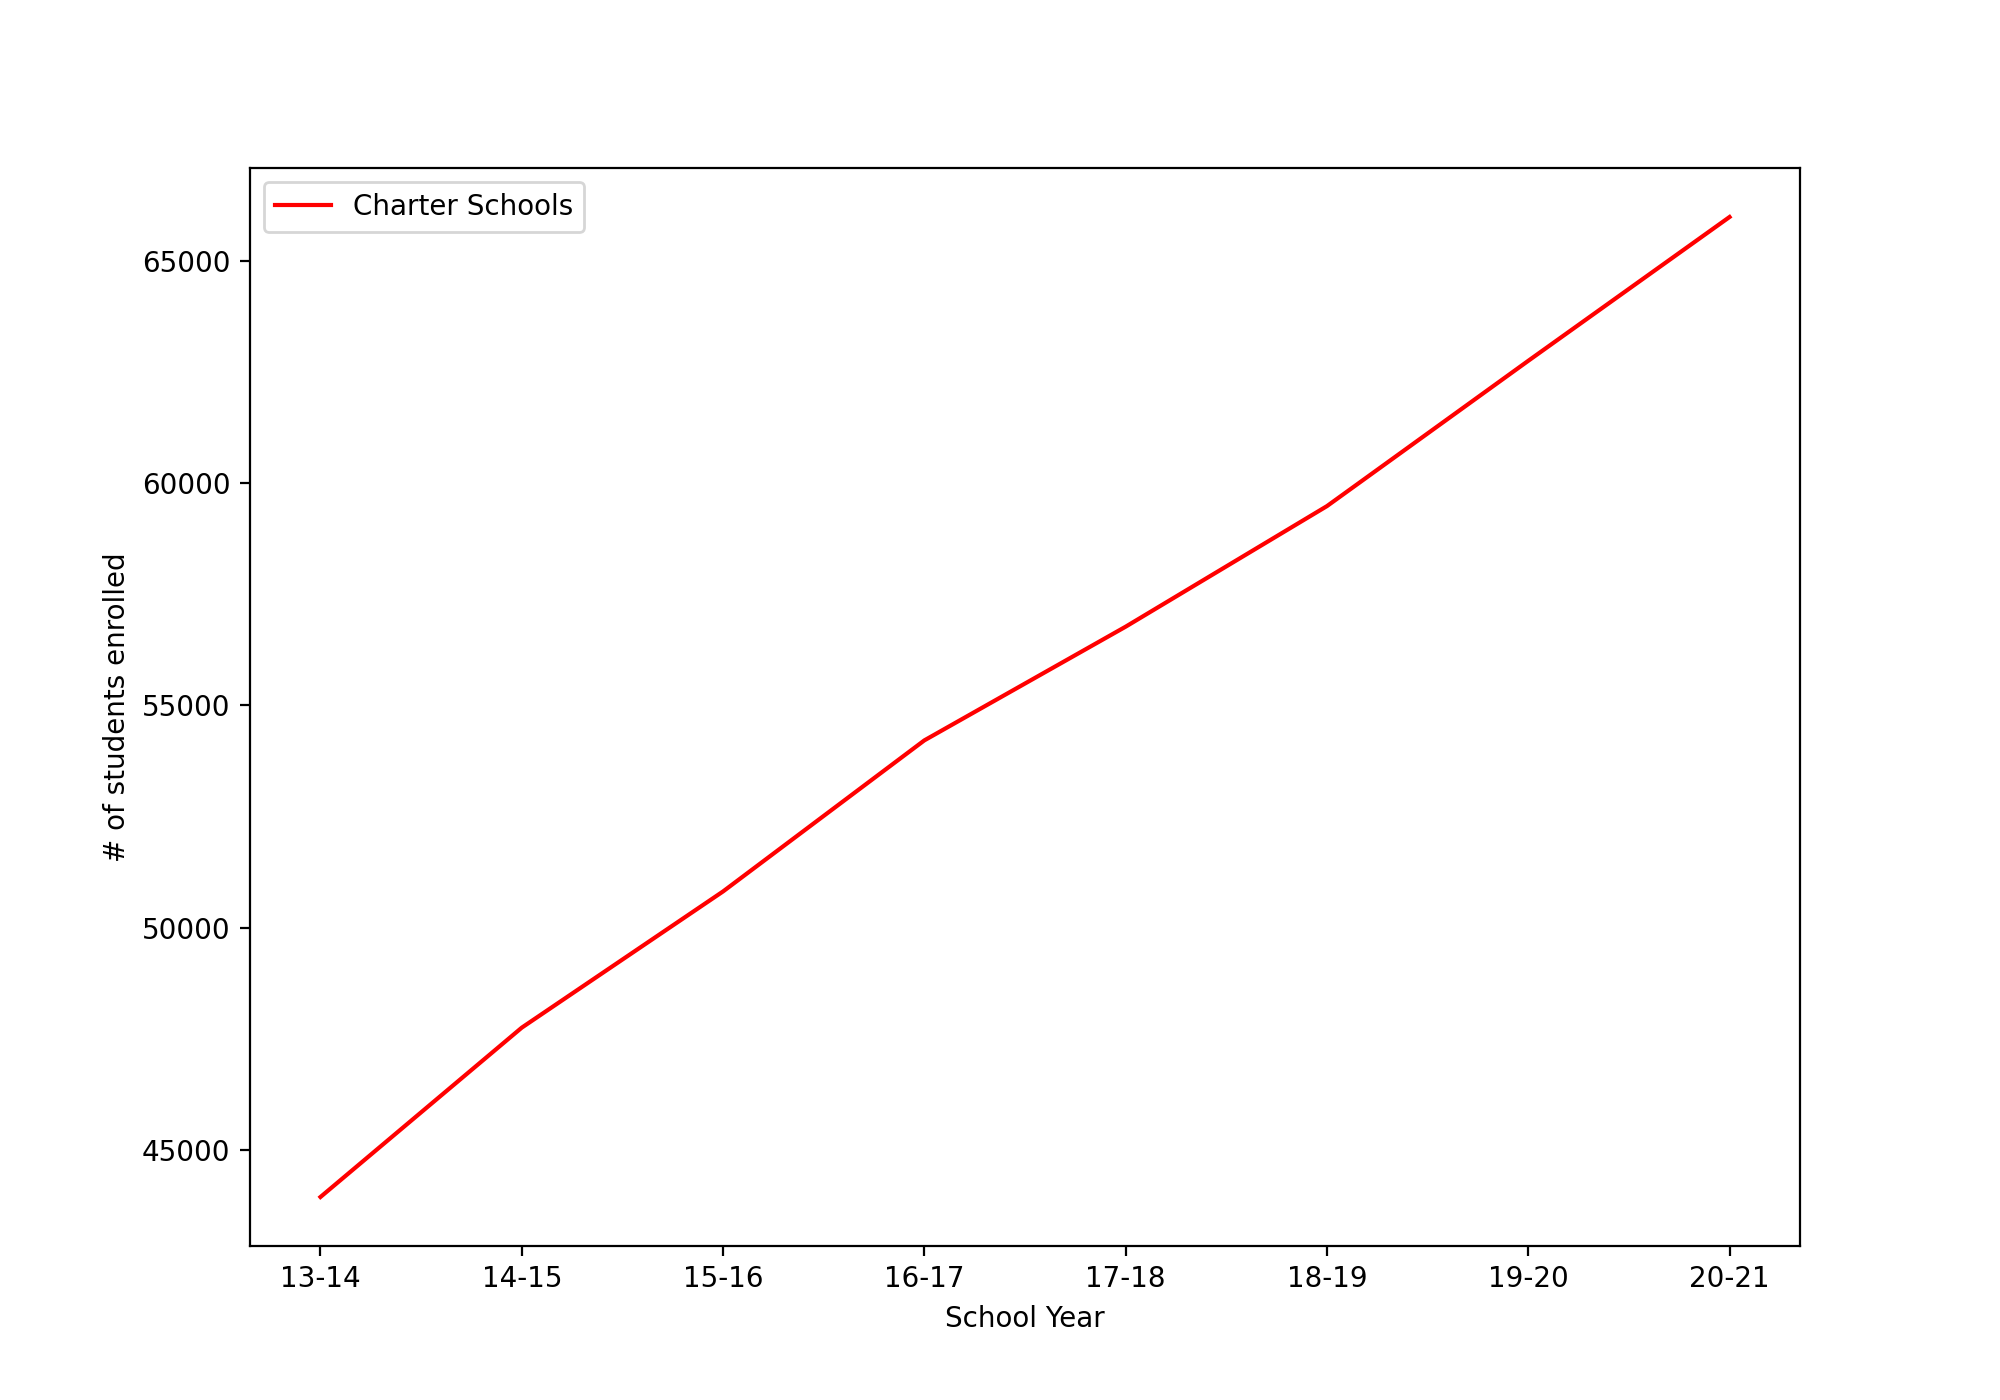

In [48]:
# -- Plot enrollment trends over time for charter schools
fig, ax = plt.subplots(figsize=(10, 7))
charter_result.plot.line(x='Data Year', y='Total Enrollment', label='Charter Schools', color='r', ax=ax)
plt.xlabel("School Year")  
plt.ylabel("# of students enrolled")  
plt.show()

<IPython.core.display.Javascript object>


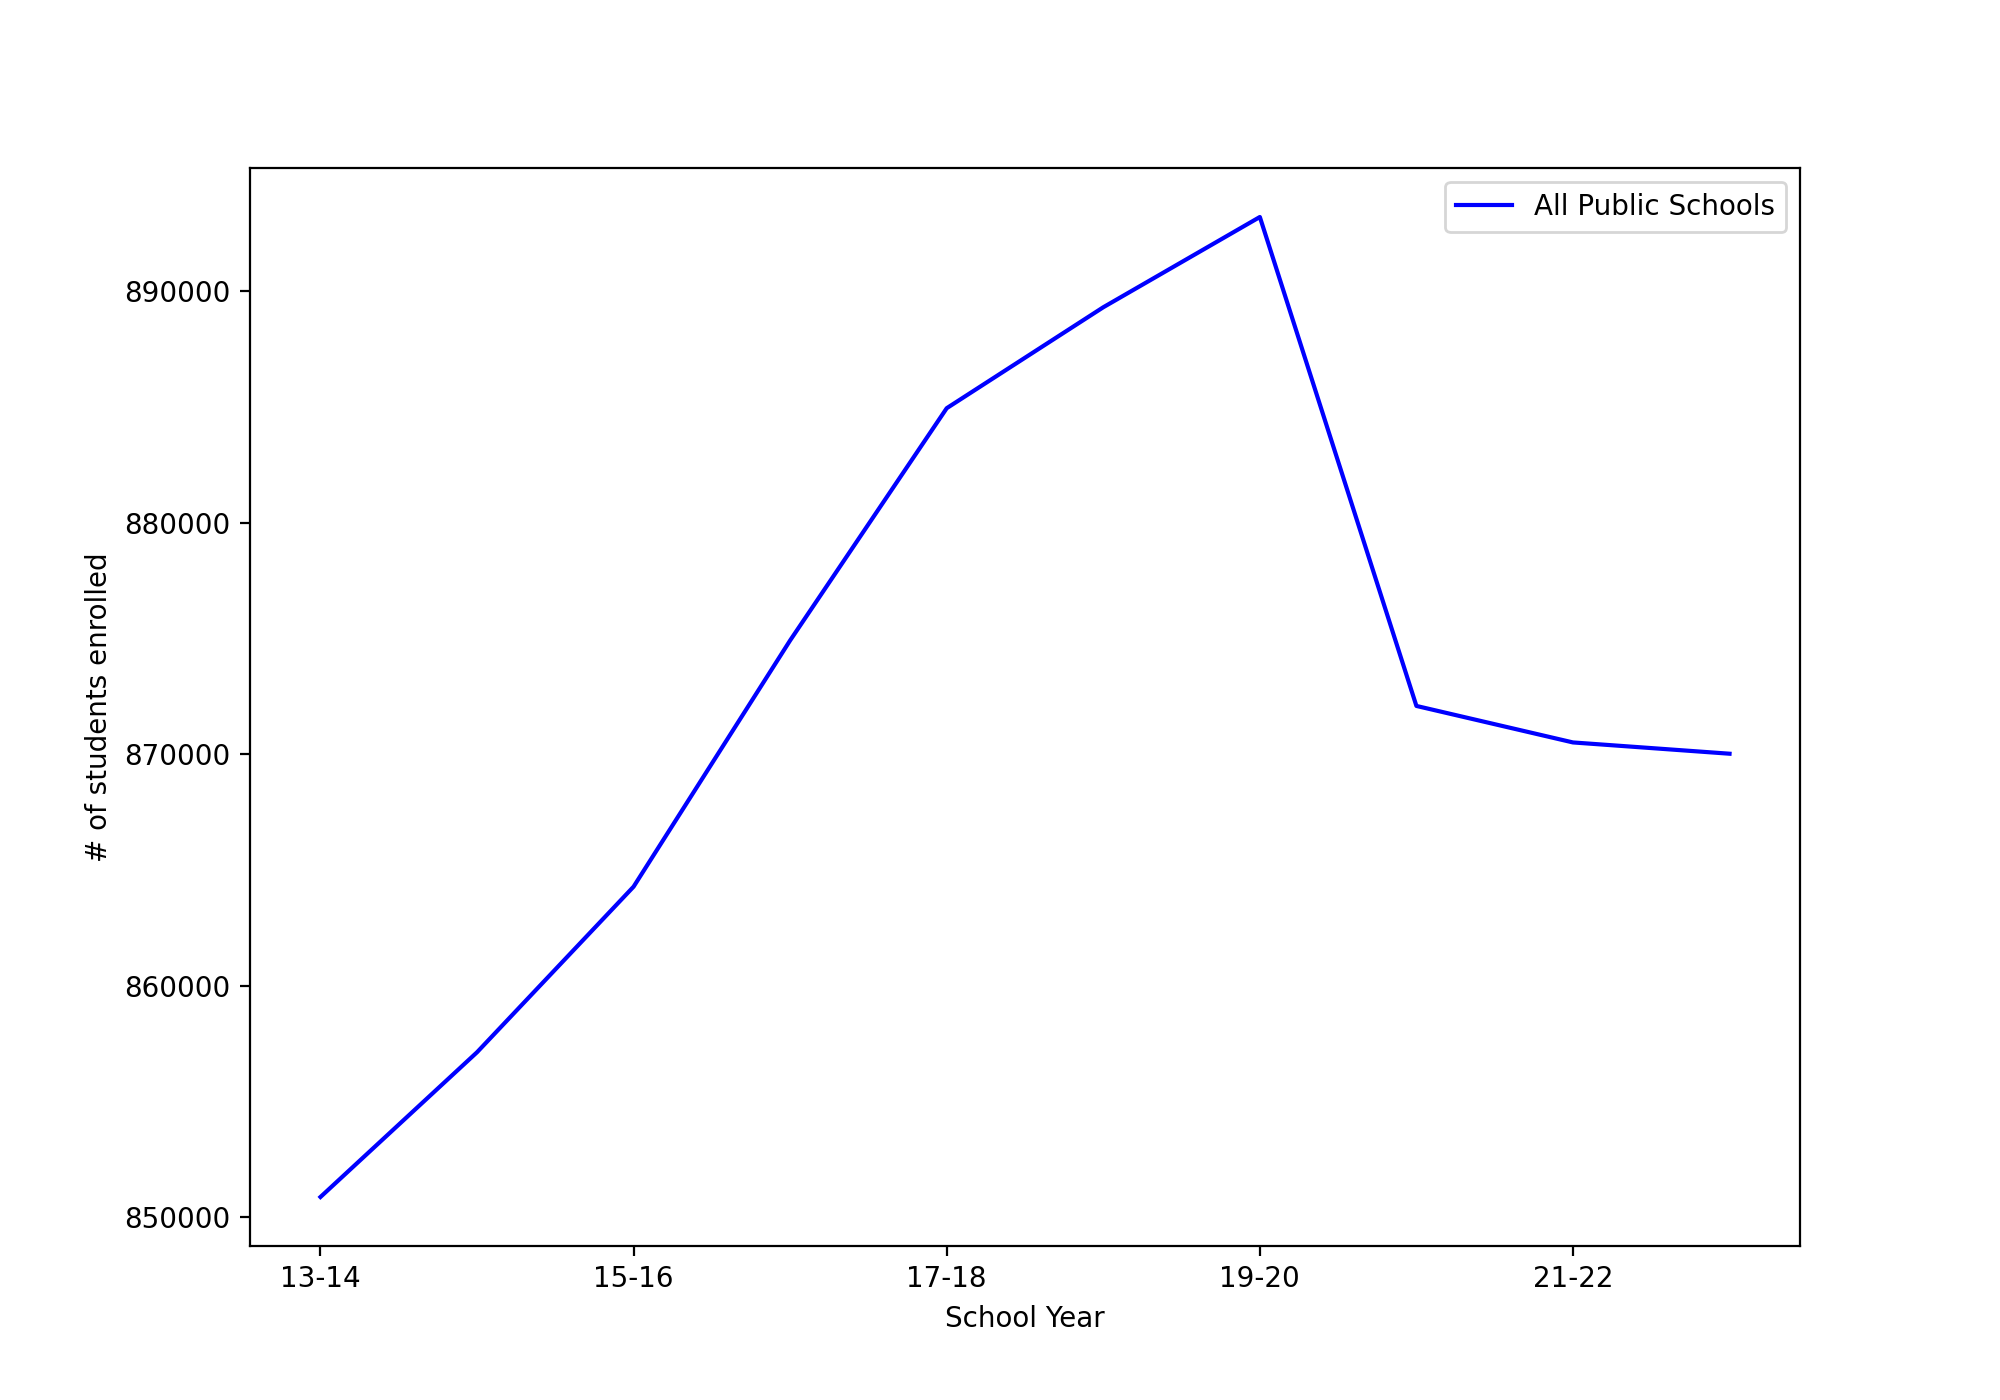

In [49]:
# -- Plot enrollment trends over time for all public schools
fig, ax = plt.subplots(figsize=(10, 7))
MN_result.plot.line(x='Data Year', y='Total Enrollment', label='All Public Schools', color='b', ax=ax)
plt.xlabel("School Year")  
plt.ylabel("# of students enrolled")  
plt.show()  

<IPython.core.display.Javascript object>


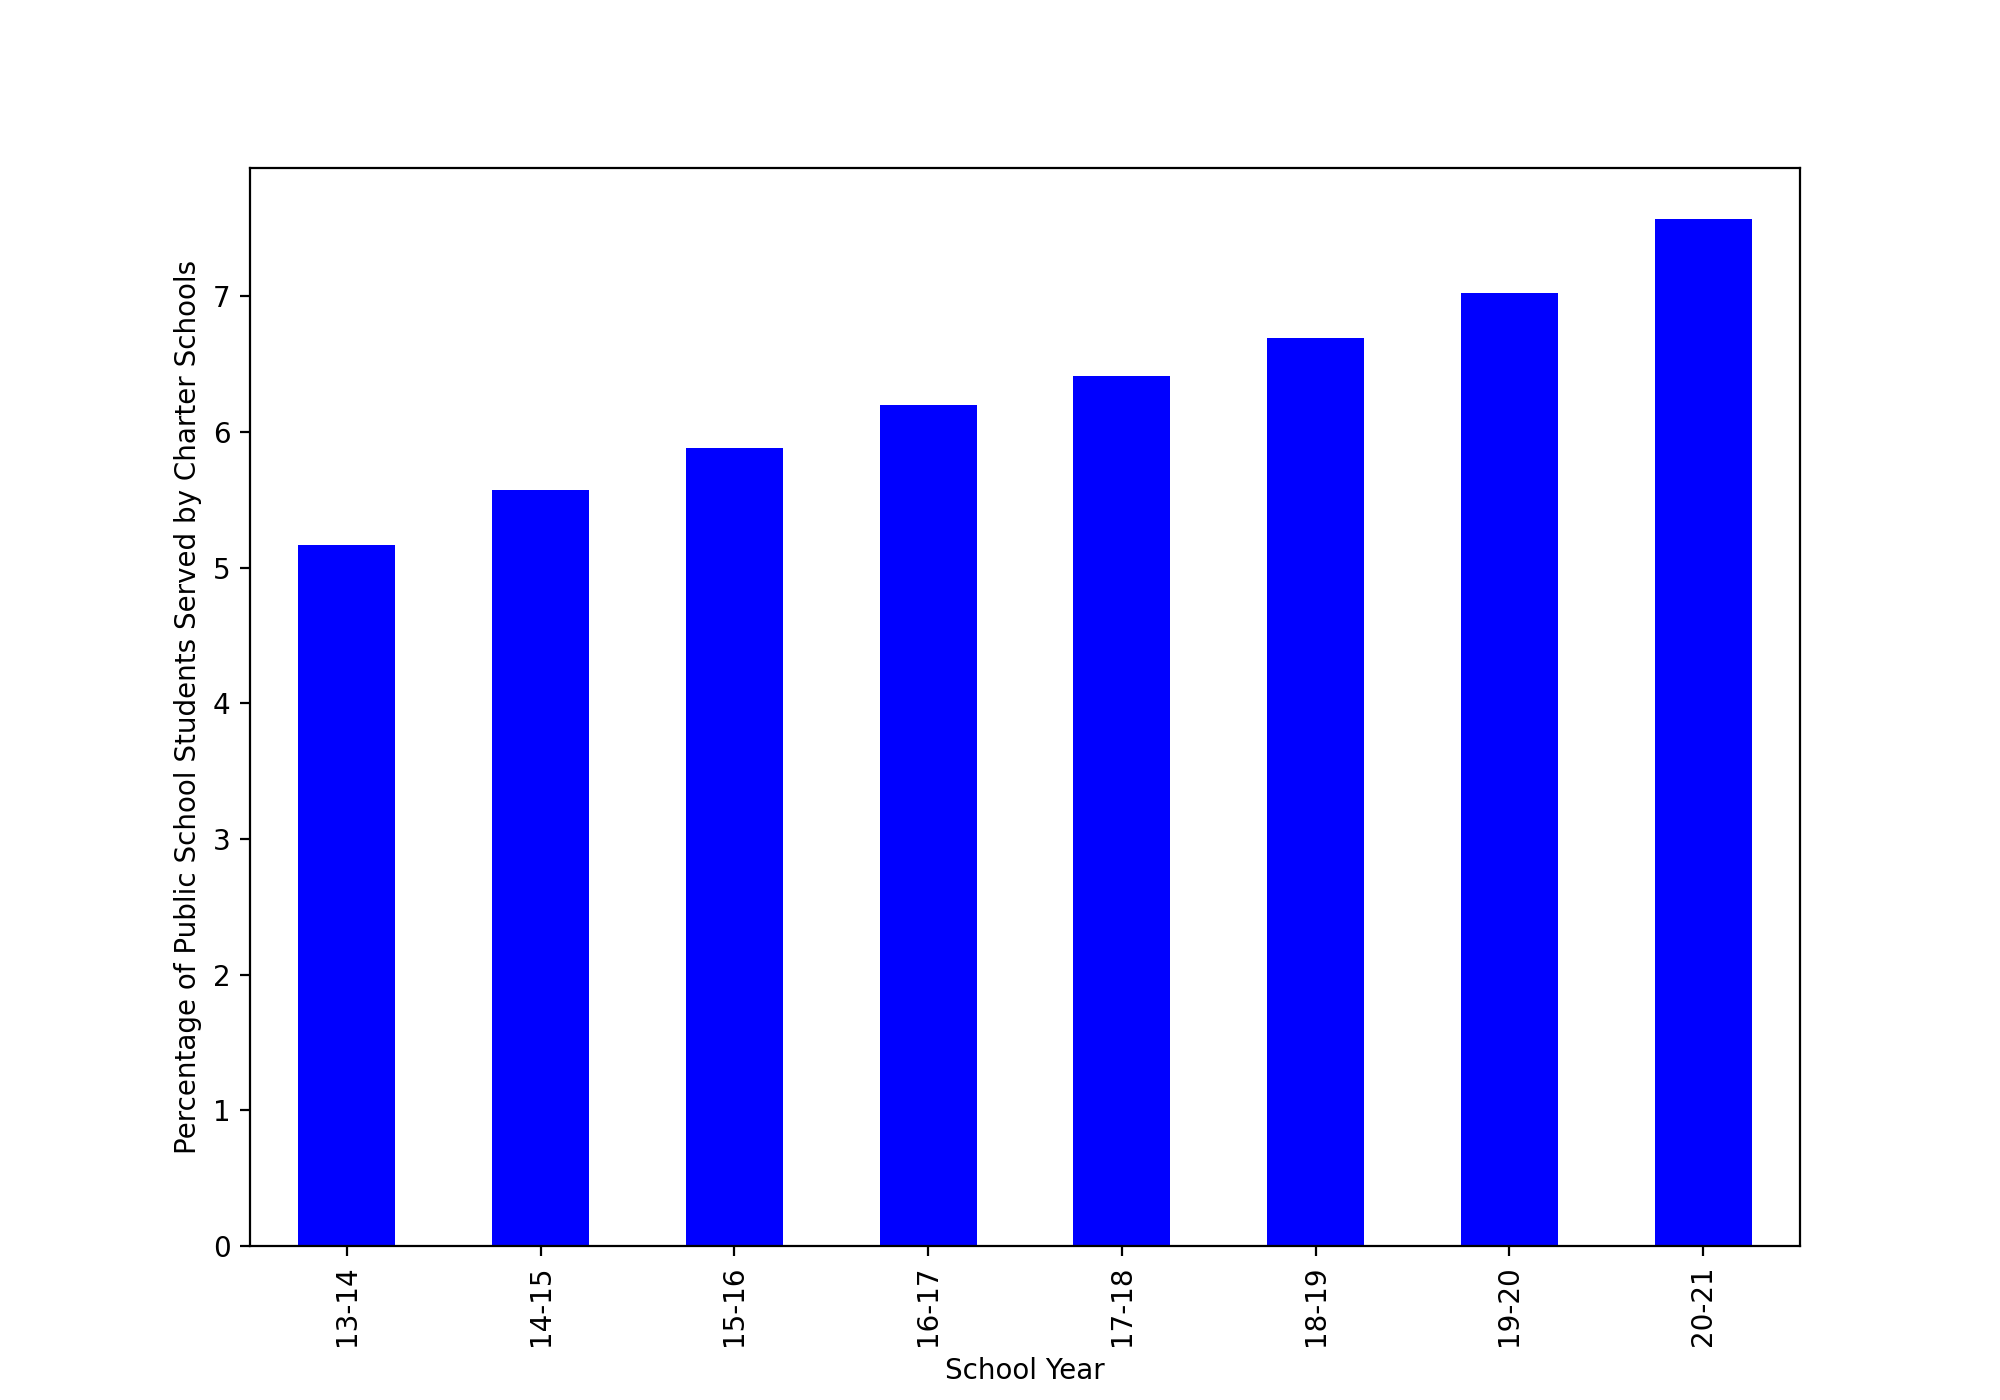

In [50]:
# -- Find Percentage of the Public Student Population Served by Charter Schools Over Time
charter_result['% of all students served']=charter_result['Total Enrollment']/MN_result['Total Enrollment']* 100

# -- Plot Result
fig, ax = plt.subplots(figsize=(10, 7))
charter_result.plot.bar(x='Data Year', y='% of all students served', legend=None, color='b', ax=ax)
plt.xlabel("School Year")  
plt.ylabel("Percentage of Public School Students Served by Charter Schools")  
plt.show()

In [51]:
# -- Calculate % of white students served versus students of color
charter_result['% of students who are white']=charter_result['Total White Count']/charter_result['Total Enrollment']* 100
charter_result ['% of students who are poc']=charter_result['Total Students of Color or American Indian Count']/charter_result['Total Enrollment']* 100
MN_result['% of all students who are white']=MN_result['Total White Count']/MN_result['Total Enrollment']*100
MN_result ['% of all students who are poc']=MN_result['Total Students of Color or American Indian Count']/MN_result['Total Enrollment']*100
charter_result['% of all white students served by charters']= charter_result['Total White Count']/MN_result['Total White Count']*100
charter_result['% of all poc students served by charters'] = charter_result['Total Students of Color or American Indian Count']/MN_result['Total Students of Color or American Indian Count']*100

<IPython.core.display.Javascript object>


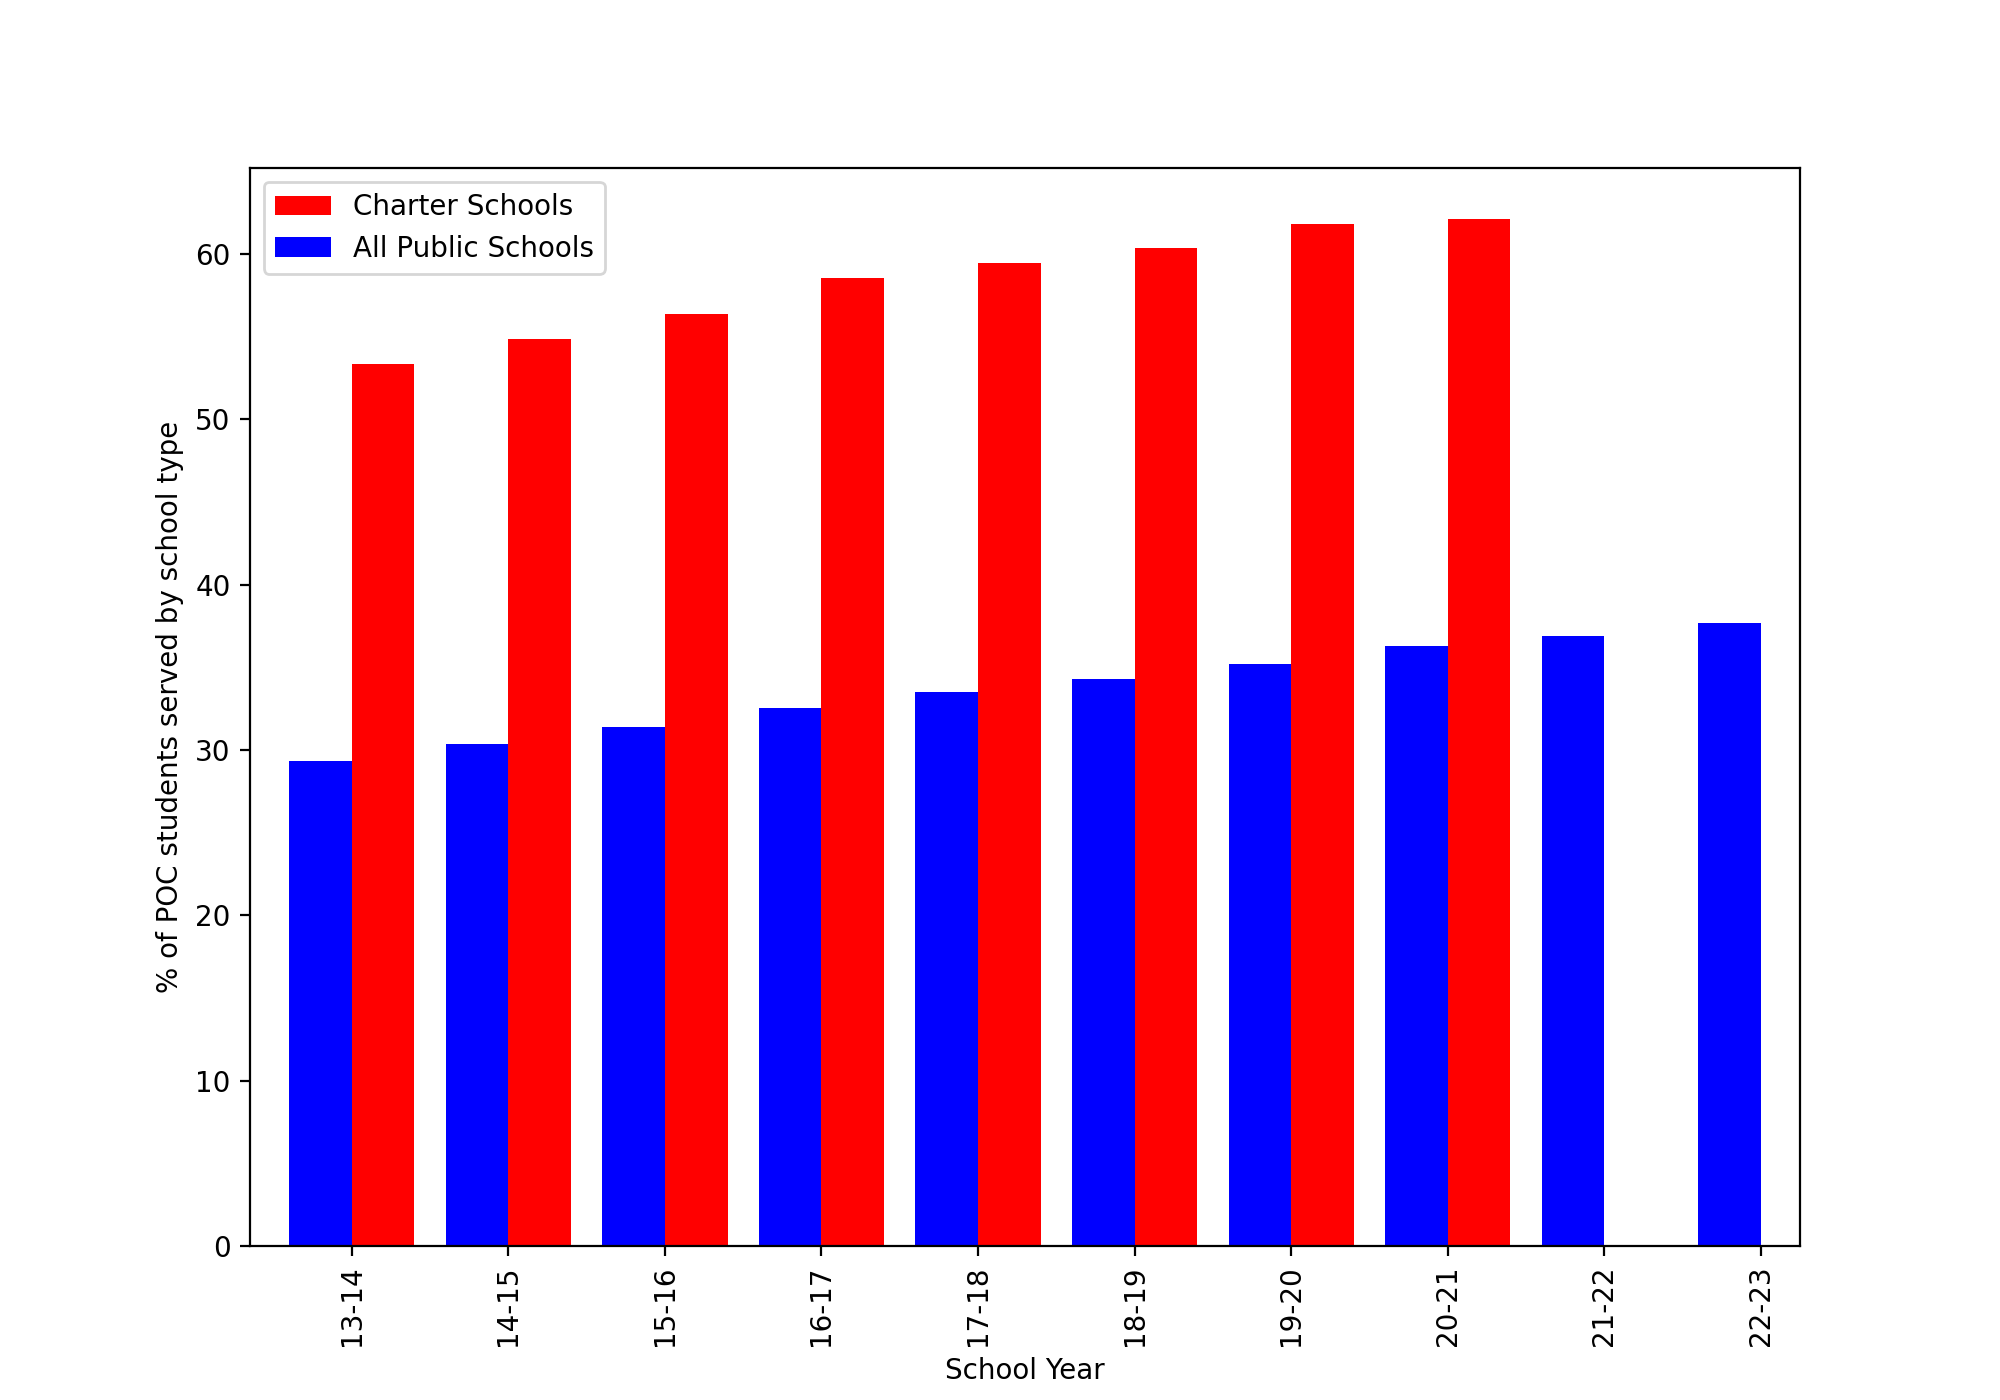

In [52]:
# -- Plot enrollment trends for students of color over time
fig, ax = plt.subplots(figsize=(10, 7))
charter_result.plot.bar(x='Data Year', y='% of students who are poc', label='Charter Schools', position=0, color='r', ax=ax, width=0.4)
MN_result.plot.bar(x='Data Year', y='% of all students who are poc', label='All Public Schools', position=1, color='b', ax=ax, width=0.4)
plt.xlabel("School Year")  
plt.ylabel("% of POC students served by school type")  
plt.show()



In [55]:
# -- Calculate averages from '14 through '23
#charter_white=charter_result['% of charter studenst who are white'].mean()
#charter_poc=charter_result ['% of charter students who are poc'].mean()
#MN_white=MN_result['% of all students who are white'].mean()
#MN_poc=MN_result ['% of all students who are poc'].mean()
#charterpct_white=charter_result['% of all white students served by charters'].mean()
#charterpct_poc=charter_result['% of all poc students served by charters'].mean()

# -- Print results
#print('Between the 2013-2014 school year and the 2022-2023 school year, the average percentage of white public school students in the state of Minnesota was', round(MN_white),'% and the average percentage of students of color was', round(MN_poc),'%.') 
#print('')   
#print('Between the 2013-2014 school year and the 2022-2023 school year, the average percentage of white charter school students in the state of Minnesota was', round(charter_white),'% and the average percentage of students of color was', round(charter_poc),'%.') 
#print('') 
#print('Between the 2013-2014 school year and the 2022-2023 school year, charter schools served', round(charterpct_white), '% of all white public school students in the state of Minnesota on average, and',round(charterpct_poc), '% of all public school students of color.')

NameError: name 'MN_white' is not defined

In [56]:
# -- Look at range of the percentage of POC students served by charter schools
# -- There will be more than 181 charter schools because schools have opened and closed over this timeframe

# -- combine subsets into a single dataframe
charter_schools = pd.concat([sy14_sub, sy15_sub, sy16_sub, sy17_sub, sy18_sub, sy19_sub, sy20_sub, sy21_sub, sy22_sub, sy23_sub])

# -- convert school names to all lower case
charter_schools['School Name'] = charter_schools['School Name'].str.lower()

# -- group by school and sum
cgrp=charter_schools.groupby("School Name").sum(numeric_only=True).reset_index()

# -- Calculate % of white students served versus students of color
cgrp['% of students who are white']=round(cgrp['Total White Count']/cgrp['Total Enrollment']* 100)
cgrp ['% of students who are poc']=round(cgrp['Total Students of Color or American Indian Count']/cgrp['Total Enrollment']* 100)

# -- Sort values from lowest to highest
charter_sorted= cgrp.sort_values("% of students who are poc")
charter_sorted

,School Name,Total Enrollment,Total Female Count,Total Male Count,Total American Indian or Alaska Native Count,Total Asian Count,Total Native Hawaiian or Pacific Islander Count,Total Hispanic or Latino Count,Total Black or African American Count,Total White Count,...,Total Students Eligible for Free or Reduced-Priced Meals Count,Total Students Receiving Special Education Services Count,Total English learner Identified Count,Total Students Experiencing Homelessness Count,Total Students Eligible for Free or Reduced Priced Meals Count,Total English Learner Identified Count,Total Students Not American Indian (State) Count,Total American Indian Count,% of students who are white,% of students who are poc
211,milroy area charter school,206.0,116.0,90.0,0.0,0.0,0.0,0.0,0.0,206.0,...,61.0,14.0,0.0,0.0,11.0,0.0,0.0,0.0,100.0,0.0
363,starland elementary,78.0,35.0,43.0,0.0,0.0,0.0,0.0,0.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
166,la crescent montessori and stem academy,42.0,20.0,22.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,6.0,0.0,0.0,13.0,0.0,0.0,0.0,100.0,0.0
238,nasha shkola charter school,1218.0,591.0,627.0,0.0,0.0,0.0,0.0,16.0,1064.0,...,502.0,32.0,298.0,1.0,328.0,393.0,129.0,0.0,87.0,2.0
200,marine village school,29.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,97.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,skyline math and science academy,1095.0,549.0,546.0,0.0,0.0,0.0,0.0,1095.0,0.0,...,192.0,48.0,0.0,0.0,0.0,767.0,233.0,0.0,0.0,100.0
203,metro college prep,882.0,391.0,491.0,0.0,0.0,0.0,1.0,879.0,1.0,...,0.0,59.0,0.0,0.0,0.0,735.0,437.0,0.0,0.0,100.0
205,metro schools charter,2179.0,1101.0,1078.0,0.0,21.0,0.0,3.0,2154.0,1.0,...,735.0,137.0,653.0,2.0,0.0,830.0,0.0,0.0,0.0,100.0
207,metro tech academy elementary,105.0,49.0,56.0,0.0,0.0,0.0,0.0,105.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,81.0,0.0,0.0,100.0


<IPython.core.display.Javascript object>


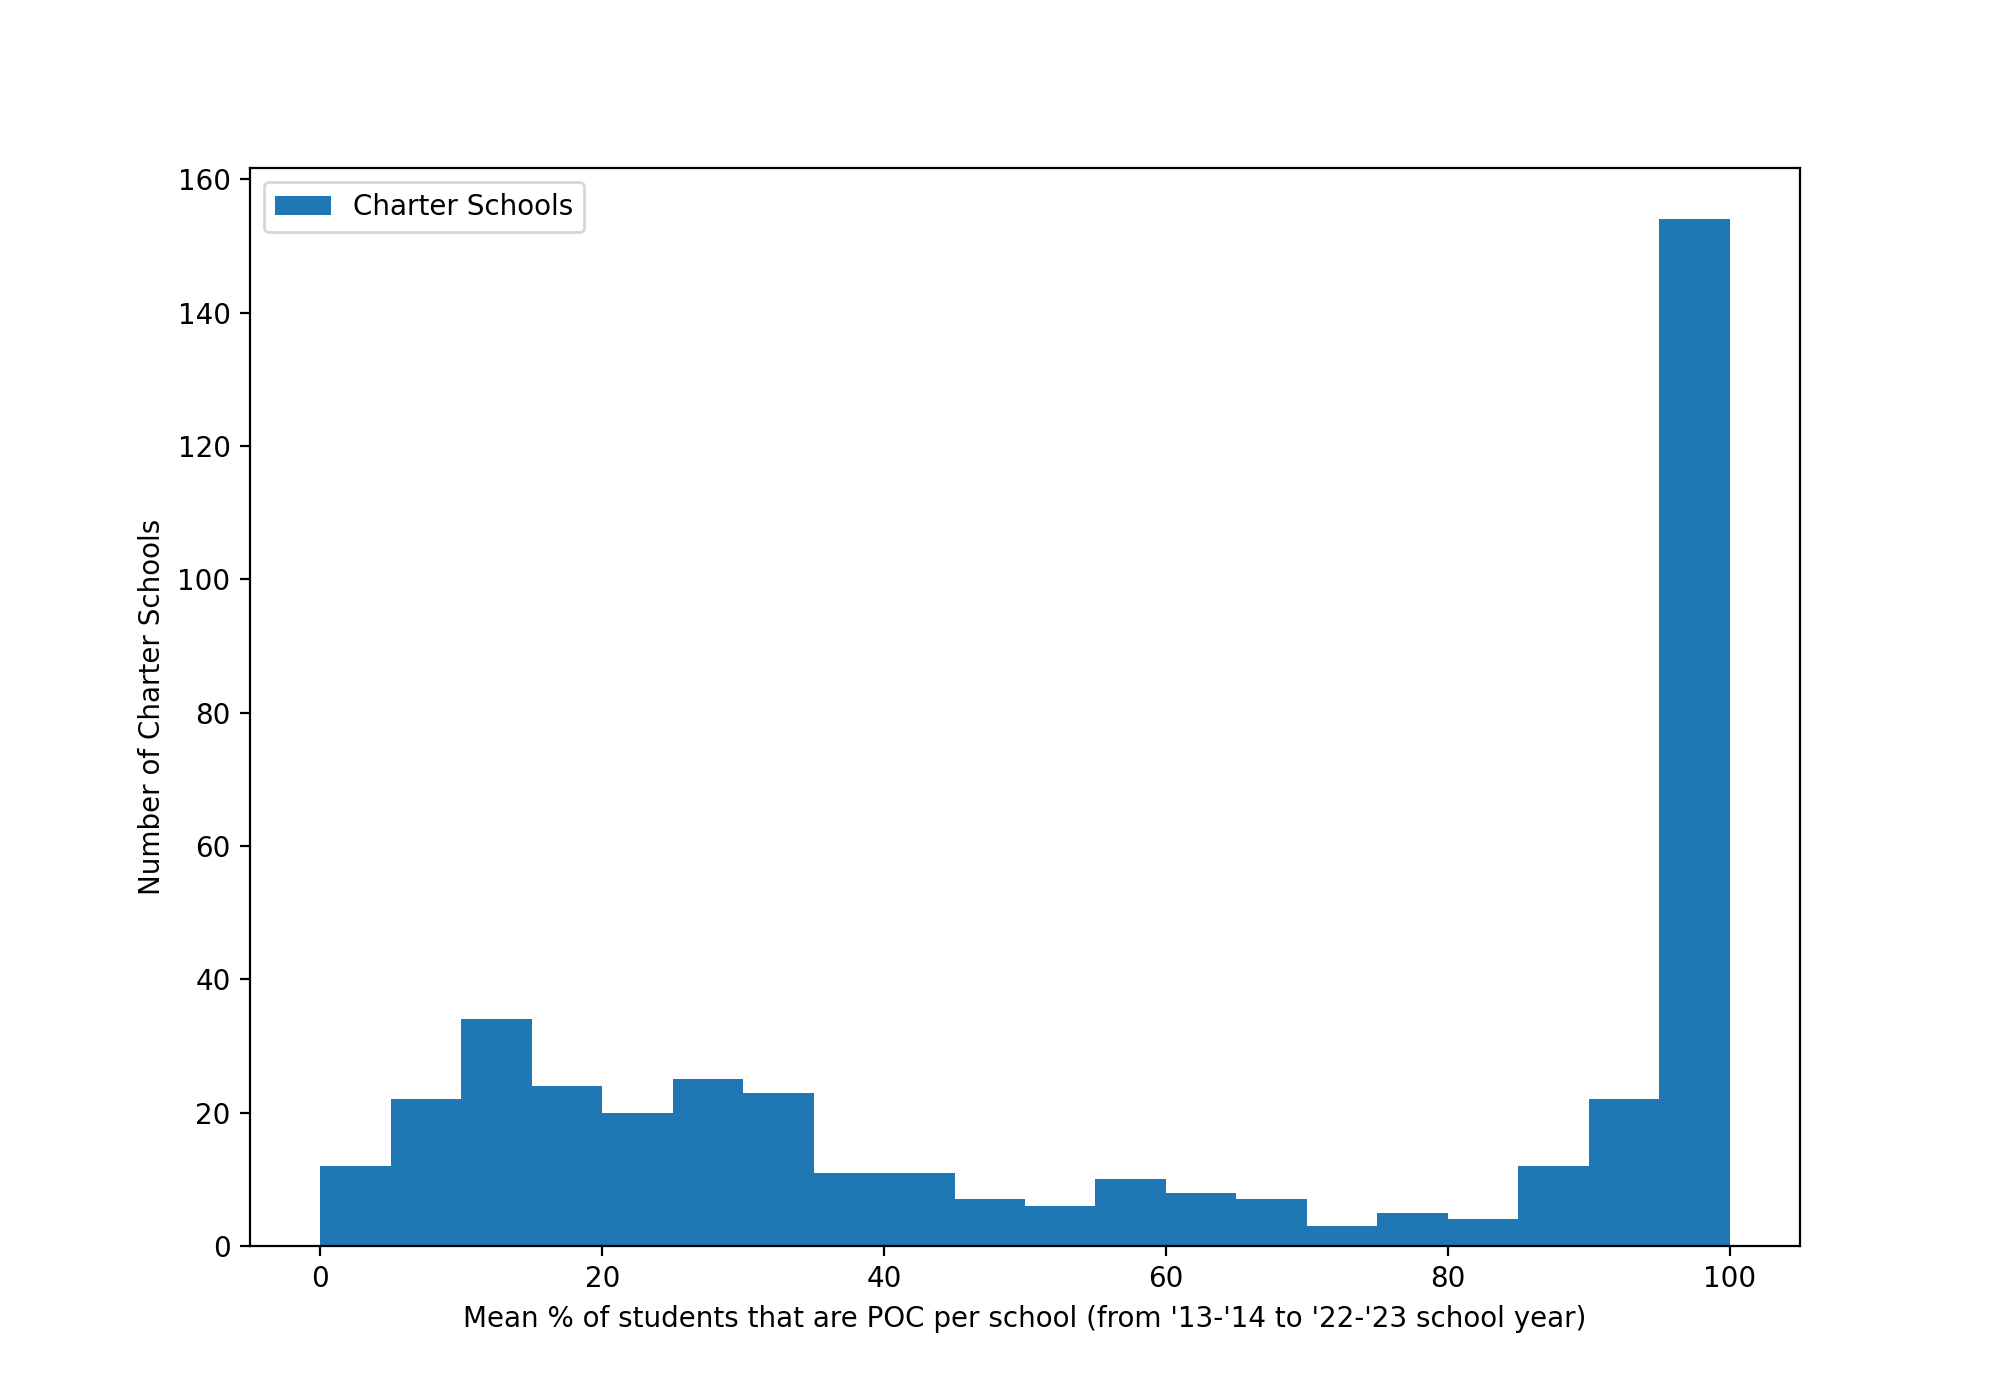

In [57]:
# -- Plot histogram
fig, ax = plt.subplots(figsize=(10, 7))
charter_sorted.reset_index().plot.hist(x='index', y='% of students who are poc', label='Charter Schools', ax=ax, bins=20)
plt.xlabel("Mean % of students that are POC per school (from '13-'14 to '22-'23 school year)")
plt.ylabel("Number of Charter Schools")
plt.show()

In [58]:
sum_zeros = charter_sorted[charter_sorted['% of students who are poc'] == 0.0]['% of students who are poc'].count()
sum_hundreds = charter_sorted[charter_sorted['% of students who are poc'] == 100.0]['% of students who are poc'].count()

print(f'There have been {sum_zeros} Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 0% students of color on average.')
print('')
print(f'There have been {sum_hundreds} Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 100% students of color on average.')

There have been 3 Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 0% students of color on average.

There have been 86 Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 100% students of color on average.


# Testing Data
This source has data on standardized testing results https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=1 and this source provides context: https://education.mn.gov/MDE/dse/test/mn/. This data may be useful in comparing academic outcomes between charters and traditional public schools.



In [59]:
# -- Load in Data by School 
math_file='https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD082118'
reading_file='https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD082119'
science_file='https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD082117'

In [60]:
math= pd.read_excel(math_file, sheet_name='School')
reading=pd.read_excel(reading_file, sheet_name='School')
science=pd.read_excel(science_file, sheet_name='School')
math

/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$14291.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: District!$1:$66850.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: School!$1:$136742.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: State!$1:$202.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area c

,Data Year,County Number,County Name,District Number,District Type,District Name,School Number,School Name,ECSU Number,Economic Development Region,...,Count Not Attempted,Count Not Complete,Count Not Enrolled,Count Refused,Count Refused - Parent,Count Refused - Student,Count Wrong Grade,Count Valid Scores MCA with Accommodations,Count Extenuating Circumstances Attempted,Count Extenuating Circumstances Not Attempted
0,22-23,1.0,Aitkin,1.0,1.0,Aitkin Public School District,1.0,Aitkin Secondary School,3,3,...,0.0,0.0,0.0,no data,0.0,0.0,0.0,0,0.0,0.0
1,22-23,1.0,Aitkin,1.0,1.0,Aitkin Public School District,1.0,Aitkin Secondary School,3,3,...,0.0,0.0,0.0,no data,0.0,0.0,0.0,1,0.0,0.0
2,22-23,1.0,Aitkin,1.0,1.0,Aitkin Public School District,1.0,Aitkin Secondary School,3,3,...,0.0,0.0,0.0,no data,6.0,0.0,0.0,0,0.0,0.0
3,22-23,1.0,Aitkin,1.0,1.0,Aitkin Public School District,1.0,Aitkin Secondary School,3,3,...,0.0,0.0,0.0,no data,6.0,0.0,0.0,1,0.0,0.0
4,22-23,1.0,Aitkin,1.0,1.0,Aitkin Public School District,2.0,Rippleside Elementary,3,3,...,0.0,0.0,0.0,no data,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136736,22-23,49.0,Morrison,6979.0,61.0,Mid-State Education District,70.0,WIN-Middle School,5,5,...,0.0,0.0,0.0,no data,1.0,0.0,0.0,no data,0.0,0.0
136737,22-23,49.0,Morrison,6979.0,61.0,Mid-State Education District,70.0,WIN-Middle School,5,5,...,0.0,0.0,0.0,no data,0.0,0.0,0.0,no data,0.0,0.0
136738,22-23,49.0,Morrison,6979.0,61.0,Mid-State Education District,70.0,WIN-Middle School,5,5,...,0.0,0.0,0.0,no data,0.0,0.0,0.0,no data,0.0,0.0
136739,22-23,49.0,Morrison,6979.0,61.0,Mid-State Education District,70.0,WIN-Middle School,5,5,...,0.0,0.0,0.0,no data,1.0,0.0,0.0,no data,0.0,0.0


In [61]:
# -- Load in Data for the State 
MN_math= pd.read_excel(math_file, sheet_name='State')
MN_reading=pd.read_excel(reading_file, sheet_name='State')
MN_science=pd.read_excel(science_file, sheet_name='State')
MN_math

/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$14291.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: District!$1:$66850.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: School!$1:$136742.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: State!$1:$202.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area c

,Data Year,County Number,County Name,District Number,District Type,District Name,School Number,School Name,ECSU Number,Economic Development Region,...,Count Not Attempted,Count Not Complete,Count Not Enrolled,Count Refused,Count Refused - Parent,Count Refused - Student,Count Wrong Grade,Count Valid Scores MCA with Accommodations,Count Extenuating Circumstances Attempted,Count Extenuating Circumstances Not Attempted
0,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,67.0,90.0,157.0,no data,792.0,33.0,2.0,1757.0,0.0,0.0
1,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,65.0,92.0,138.0,no data,825.0,28.0,4.0,2130.0,0.0,0.0
2,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,70.0,109.0,151.0,no data,997.0,37.0,2.0,2210.0,0.0,0.0
3,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,109.0,164.0,165.0,no data,1239.0,67.0,1.0,2046.0,0.0,0.0
4,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,169.0,222.0,234.0,no data,1857.0,151.0,2.0,1850.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,169.0,222.0,233.0,no data,1846.0,151.0,2.0,1846.0,0.0,0.0
197,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,183.0,251.0,284.0,no data,2875.0,240.0,5.0,1675.0,0.0,0.0
198,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,1040.0,611.0,437.0,no data,8191.0,2658.0,16.0,833.0,0.0,0.0
199,22-23,no data,no data,9999.0,99.0,STATEWIDE,no data,no data,,,...,1701.0,1535.0,1551.0,no data,16752.0,3213.0,32.0,12481.0,0.0,0.0
